In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hogar = pd.read_csv("casa_bcn_clean.csv")
hogar = hogar[["timestamp", "consumo_kwh"]]
hogar.head()

,timestamp,consumo_kwh
0,2017-12-11 01:00:00,0.327
1,2017-12-11 02:00:00,0.180
2,2017-12-11 03:00:00,0.138
3,2017-12-11 04:00:00,0.137
4,2017-12-11 05:00:00,0.135


In [3]:
precio = pd.read_csv("precio_consumo_electrico_timestamp_media.csv")
precio = precio.drop(columns=["consumo_kwh", "coste_euros"])
precio.head()

,timestamp,€/kwh
0,2014-11-02 01:00:00,0.0
1,2014-11-02 02:00:00,0.0
2,2014-11-02 03:00:00,0.0
3,2014-11-02 04:00:00,0.0
4,2014-11-02 05:00:00,0.0


In [4]:
dataAgente = pd.merge(hogar, precio, on="timestamp", how="inner")
dataAgente.head()

,timestamp,consumo_kwh,€/kwh
0,2017-12-11 01:00:00,0.327,0.151940
1,2017-12-11 02:00:00,0.180,0.143204
2,2017-12-11 03:00:00,0.138,0.138608
3,2017-12-11 04:00:00,0.137,0.151818
4,2017-12-11 05:00:00,0.135,0.166087


In [5]:
dataAgente.to_csv("dataAgente.csv")

In [6]:
csv_file = 'dataAgente.csv'
df = pd.read_csv(csv_file)

price_col = "€/kwh"
consumo_col = "consumo_kwh"
# Creamos la columna con el precio "futuro" (el valor del día siguiente).
df["price_future"] = df[price_col].shift(-1)
df["consumo_futuro"] = df[consumo_col].shift(-1)

# Como la última fila ahora tendrá un valor NaN en "price_future",
# podemos eliminarla para evitar problemas en el entorno.
df.dropna(subset=["price_future"], inplace=True)
df.dropna(subset=["consumo_futuro"], inplace=True)

df.reset_index(drop=True, inplace=True)

df = df.drop(columns=["Unnamed: 0"])

print("Columnas disponibles en el CSV:", df.columns.tolist())
df

Columnas disponibles en el CSV: ['timestamp', 'consumo_kwh', '€/kwh', 'price_future', 'consumo_futuro']


,timestamp,consumo_kwh,€/kwh,price_future,consumo_futuro
0,2017-12-11 01:00:00,0.327,0.151940,0.143204,0.180
1,2017-12-11 02:00:00,0.180,0.143204,0.138608,0.138
2,2017-12-11 03:00:00,0.138,0.138608,0.151818,0.137
3,2017-12-11 04:00:00,0.137,0.151818,0.166087,0.135
4,2017-12-11 05:00:00,0.135,0.166087,0.197537,0.147
...,...,...,...,...,...
19458,2020-02-29 19:00:00,0.207,0.307767,0.278779,0.154
19459,2020-02-29 20:00:00,0.154,0.278779,0.203847,0.115
19460,2020-02-29 21:00:00,0.115,0.203847,0.191243,0.115
19461,2020-02-29 22:00:00,0.115,0.191243,0.157012,0.109


In [7]:
df.to_csv("dataAgente.csv")

    timestamp  price_future  consumo_futuro
0  2017-12-11      0.194697        0.353043
1  2017-12-12      0.191995        0.408083
2  2017-12-13      0.192772        0.351875
3  2017-12-14      0.192121        0.432333
4  2017-12-15      0.193133        0.476667


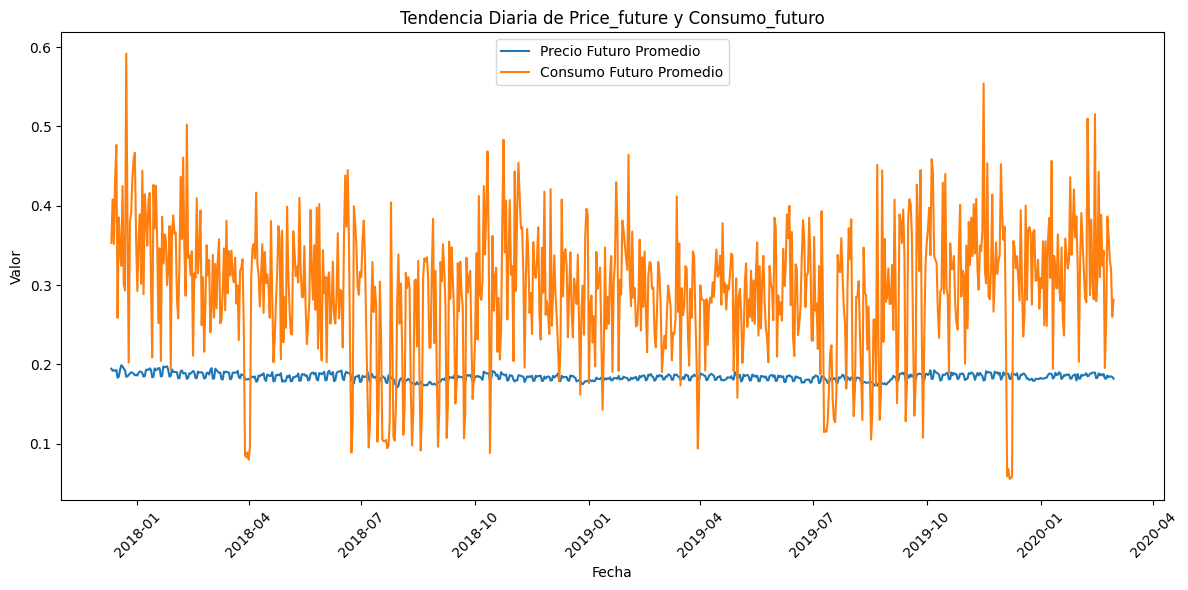

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna de fecha a datetime (ajusta el nombre de la columna si es distinto)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Agrupar por día (usando la parte de la fecha) y calcular la media de las variables
tendencias_diarias = df.groupby(df['timestamp'].dt.date)[['price_future', 'consumo_futuro']].mean().reset_index()

# Mostrar las primeras filas del resumen
print(tendencias_diarias.head())

# Graficar las tendencias diarias
plt.figure(figsize=(12,6))
plt.plot(tendencias_diarias['timestamp'], tendencias_diarias['price_future'], label='Precio Futuro Promedio')
plt.plot(tendencias_diarias['timestamp'], tendencias_diarias['consumo_futuro'], label='Consumo Futuro Promedio')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Tendencia Diaria de Price_future y Consumo_futuro')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
tendencias_diarias.to_csv("tendencias_diarias.csv")
tendencias_diarias

,timestamp,price_future,consumo_futuro
0,2017-12-11,0.194697,0.353043
1,2017-12-12,0.191995,0.408083
2,2017-12-13,0.192772,0.351875
3,2017-12-14,0.192121,0.432333
4,2017-12-15,0.193133,0.476667
...,...,...,...
806,2020-02-25,0.184004,0.362833
807,2020-02-26,0.184842,0.331875
808,2020-02-27,0.184978,0.319500
809,2020-02-28,0.184270,0.259958


In [10]:
df = df.drop(columns=["price_future","consumo_futuro"])
df

,timestamp,consumo_kwh,€/kwh
0,2017-12-11 01:00:00,0.327,0.151940
1,2017-12-11 02:00:00,0.180,0.143204
2,2017-12-11 03:00:00,0.138,0.138608
3,2017-12-11 04:00:00,0.137,0.151818
4,2017-12-11 05:00:00,0.135,0.166087
...,...,...,...
19458,2020-02-29 19:00:00,0.207,0.307767
19459,2020-02-29 20:00:00,0.154,0.278779
19460,2020-02-29 21:00:00,0.115,0.203847
19461,2020-02-29 22:00:00,0.115,0.191243


In [11]:
df.to_csv("dataAgente.csv")